## Final EDA

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib as mpl

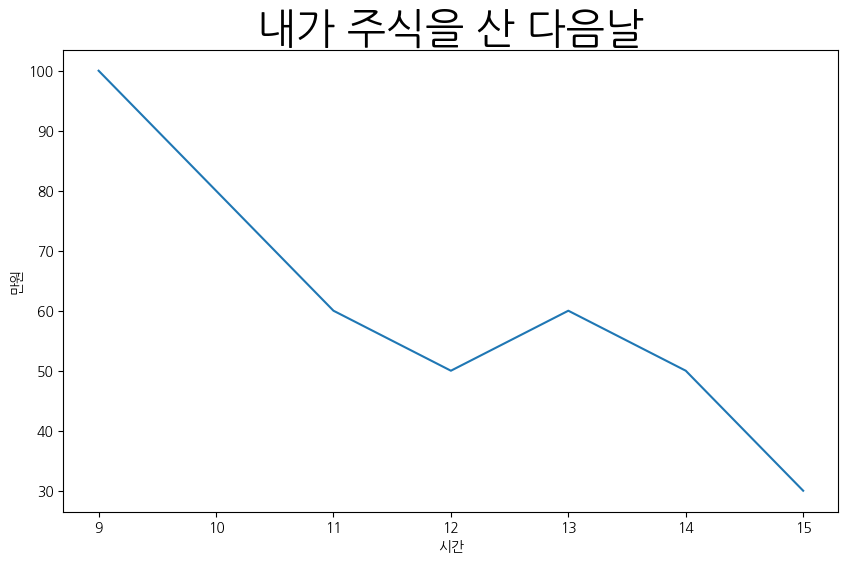

In [ ]:
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
plt.plot([9, 10, 11, 12, 13, 14, 15], [100, 80, 60, 50, 60, 50, 30])
plt.title('내가 주식을 산 다음날', size=30)
plt.xlabel('시간')
plt.ylabel('만원')
plt.show()

In [ ]:
# ## 데이터 포맷 저장
# lease_df.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/4_final_lease.csv", index=False, date_format="%Y-%m-%d")

# 로드시 참고
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/5_non_outlier.csv",
                 parse_dates=["계약날짜"],  # 날짜 컬럼 복구
                 dtype={                  # category 컬럼 복구
                     "주택유형": "category",
                     "계약구분보완(범주)": "category",
                     "계약분기": "category"
                 })


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

def distribution_plot(df, numeric_columns, save_path = None):
    """
    전세/월세별 수치형 변수의 분포를 선 그래프로 시각화하는 함수
    df: pandas DataFrame
    numeric_columns: 수치형 데이터 컬럼 목록
    housing_type: 분석할 주택유형 (기본값은 None으로 전체 데이터 분석)
    """

    # 주택 유형별 필터링
    housing_type = df["주택유형"].iloc[2]
    rent = "전세"


    plt.figure(figsize=(12, len(numeric_columns) * 3))  # 가변적인 크기 설정

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)  # 여러 개의 그래프 배치

        # 전세 (파란색) - 선 그래프
        sns.kdeplot(df[col], label=f"전세 {col}", color='blue', linewidth=2)

        plt.title(f"{col} 분포 ({housing_type if housing_type else '전체'})")
        plt.legend()

    plt.tight_layout()
    plt.savefig(f"{save_path}Distribution_{housing_type}.png", dpi=300, bbox_inches='tight')
    plt.show()

# 3. 히트맵 (상관행렬)
def heat_map(df, numeric_columns, save_path = None):
    """
    df param: pandas DataFrame
    numeric_columns param: list of numeric columns
    is_rent param: 월세 여부 (1이면 월세, 0이면 전세)
    housing_type param: 주택유형 (None이면 전체)
    """
    # 월세유무와 주택유형을 인자로 받아 필터링

    housing_type = df["주택유형"].iloc[2]
    rent = "전세"


    corr_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{housing_type}-{rent}상관행렬 히트맵')
    plt.savefig(f"{save_path}{rent}-{housing_type}_ScatterMatrix.png", dpi=300, bbox_inches='tight')
    plt.show()


def scatter_plot(df, numeric_columns, save_path=None):
    """
    df param: pandas DataFrame
    numeric_columns param: list of numeric columns
    save_path param: Save directory path (str)
    """
    # 주택유형 & 전월세구분 가져오기
    housing_type = df["주택유형"].iloc[2]
    rent = "전세"

    # Pairplot 생성 (is_rent 없이)
    pairplot = sns.pairplot(df[numeric_columns],
                             diag_kind="kde",
                             diag_kws={"fill": True, "alpha": 0.5},  # 밀도 색상 투명도 추가
                             plot_kws={"s": 5, "alpha": 0.7})  # 점 크기 & 투명도 조정

    # 화질 개선
    pairplot.fig.set_dpi(500)  # DPI 높이기
    pairplot.fig.set_size_inches(15, 10)  # 크기 조정

    # 저장 경로 처리
    if save_path:
        filename = f"{rent}-{housing_type}_ScatterMatrix.png"

        pairplot.savefig(filename, dpi=500, bbox_inches="tight")  # 고화질 저장

    plt.show()

def scatter_plot(df, numeric_columns, save_path=None):
    """
    모든 플롯을 파란색으로 그리는 scatter matrix 함수.

    Parameters:
    df : pandas DataFrame
    numeric_columns : 리스트, 숫자형 컬럼명 리스트
    save_path : str, 저장할 경로 (기본값: None)
    """
    # PairGrid 생성
    g = sns.PairGrid(df[numeric_columns])

    # 대각선: 밀도 함수 (KDE, 파란색)
    g.map_diag(sns.kdeplot, color="blue", fill=True, alpha=0.5)

    # 비대각선: 산점도 (파란색)
    g.map_offdiag(sns.scatterplot, color="blue", alpha=0.7, s=5)

    # DPI 및 크기 조정
    g.fig.set_dpi(300)
    g.fig.set_size_inches(15, 10)

    # 저장 처리
    if save_path:
        os.makedirs(save_path, exist_ok=True)  # 디렉토리 없으면 생성
        filename = os.path.join(save_path, "ScatterMatrix.png")
        g.fig.savefig(filename, dpi=300, bbox_inches='tight')  # 확실한 저장 처리
        print(f"✅ 저장 완료: {filename}")

    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903525 entries, 0 to 903524
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   단지명              903525 non-null  object        
 1   주택유형             903525 non-null  category      
 2   전체주소             903525 non-null  object        
 3   계약날짜             903525 non-null  datetime64[ns]
 4   계약구분보완(범주)       903525 non-null  category      
 5   계약분기             903525 non-null  category      
 6   건축년도             903525 non-null  int64         
 7   계약연도             903525 non-null  int64         
 8   계약개월수            903525 non-null  int64         
 9   층                903525 non-null  int64         
 10  전용면적m            903525 non-null  float64       
 11  갱신요구권사용(2진)      903525 non-null  int64         
 12  종전계약유무(2진)       903525 non-null  int64         
 13  보증금만원            903525 non-null  float64       
 14  종전계약보증금만원        903

In [ ]:
df['구_단지별_이상치만원(2진)'] = df['구_단지별_이상치만원(2진)'].astype(int)

<ipython-input-15-708c22716ae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구_단지별_이상치만원(2진)'] = df['구_단지별_이상치만원(2진)'].astype(int)


In [ ]:
from sklearn.cluster import KMeans

# 단지별 평균가로 KMeans 클러스터링 (예: 10개 그룹)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["단지클러스터"] = kmeans.fit_predict(df[["단지별평균보증금만원"]])

In [ ]:

df = df[[
    # ✅ 부동산 정보 (날짜, 위치, 건축 관련)
    "단지명", "주택유형", "전체주소", "계약날짜", "계약구분보완(범주)", "계약분기",
    "건축년도", "계약연도", "계약개월수", "층", "전용면적m",

    # ✅ 계약 특성 (갱신 여부, 신규 계약 여부, 종전 계약 여부)
    "갱신요구권사용(2진)", "종전계약유무(2진)",

    # ✅ 보증금 관련 (현재 보증금, 종전 계약 보증금, 보증금 변화)
    "보증금만원", "종전계약보증금만원", "보증금변화만원", "보증금log", "보증금면적비",
    "단지별평균보증금만원",

    # ✅ 경제 지표 (금리, 지수, 경제 이벤트)
    "Index", "Rate", "PpRate",

    # ✅ 지역 및 단지 정보 (단지 및 구별 통계)
    "단지갯수", "구갯수",
    "구_단지별_이상치(2진)","구_단지별_이상치만원(2진)", "단지클러스터"
]]


In [ ]:
df

,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,건축년도,계약연도,계약개월수,층,...,보증금면적비,단지별평균보증금만원,Index,Rate,PpRate,단지갯수,구갯수,구_단지별_이상치(2진),구_단지별_이상치만원(2진),단지클러스터
0,대성유니드,아파트,서울특별시 성동구 마장로37길 7,2019-04-30,신규,2,2004,2019,24,18,...,636.515913,53752.296588,2203.59,1.75,5.285769,494,40051,0,0,4
1,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,2000,2019,24,12,...,607.956558,54107.646751,2203.59,1.75,5.285769,1960,40051,0,0,4
2,대림e-편한세상,아파트,서울특별시 성동구 행당로 79,2019-04-30,신규,2,2000,2019,24,2,...,553.788147,49621.343129,2203.59,1.75,5.285769,3281,40051,0,0,4
3,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,8,...,827.286265,93082.987887,2203.59,1.75,5.285769,1240,8537,0,0,2
4,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,2017,2019,24,6,...,825.121411,93082.987887,2203.59,1.75,5.285769,1240,8537,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903520,현대썬앤빌601,오피스텔,서울특별시 동대문구 장한로 91,2024-05-01,신규,2,2015,2024,24,16,...,499.286733,11725.609756,2636.52,3.50,5.091858,726,33540,0,0,3
903521,가우디오피스텔,오피스텔,서울특별시 동대문구 장한로 80,2024-05-01,신규,2,2020,2024,24,5,...,880.851064,21359.615385,2636.52,3.50,5.091858,92,33540,0,0,3
903522,마곡 파크뷰 대방디엠시티 오피스텔,오피스텔,서울특별시 강서구 마곡동로10길 23,2024-05-01,갱신,2,2019,2024,12,10,...,798.350825,19539.735584,2636.52,3.50,5.091858,2171,85770,0,0,3
903523,방학신화 하니엘시티,오피스텔,서울특별시 도봉구 노해로63가길 229,2024-05-01,신규,2,2021,2024,24,2,...,850.031908,13681.830065,2636.52,3.50,5.091858,299,26469,0,0,3


In [ ]:
df.columns

Index(['단지명', '주택유형', '전체주소', '계약날짜', '계약구분보완(범주)', '계약분기', '건축년도', '계약연도',
       '계약개월수', '층', '전용면적m', '갱신요구권사용(2진)', '종전계약유무(2진)', '보증금만원',
       '종전계약보증금만원', '보증금변화만원', '보증금log', '보증금면적비', '단지별평균보증금만원', 'Index',
       'Rate', 'PpRate', '단지갯수', '구갯수', '구_단지별_이상치(2진)', '구_단지별_이상치만원(2진)',
       '단지클러스터'],
      dtype='object')

In [ ]:
features = [
    "건축년도", "계약연도", "계약개월수", "층", "전용면적m",
    "계약날짜",
    "보증금log","보증금만원", "보증금면적비", "종전계약보증금만원",

    "Index", "Rate", "PpRate", "단지갯수", "구갯수",

    "갱신요구권사용(2진)", "종전계약유무(2진)", "구_단지별_이상치(2진)", "구_단지별_이상치만원(2진)",

    "단지클러스터", "주택유형", "계약구분보완(범주)", "계약분기"
]
df_deep = df[features]

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/6_non_outlier.csv", index=False, date_format="%Y-%m-%d")


In [ ]:
df_deep.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/6_non_outlier_reduced_col.csv", index=False, date_format="%Y-%m-%d")

In [ ]:
numeric_columns = [
    "건축년도", "계약연도", "계약개월수", "층", "전용면적m",
    '보증금만원', '종전계약보증금만원', '보증금변화만원', '보증금log', '보증금면적비', '단지별평균보증금만원','단지별평균보증금log',
    'Index', 'Rate', 'PpRate', '단지갯수', '구갯수']

#### EDA
- np.log1p(x) ↔ np.expm1(x)

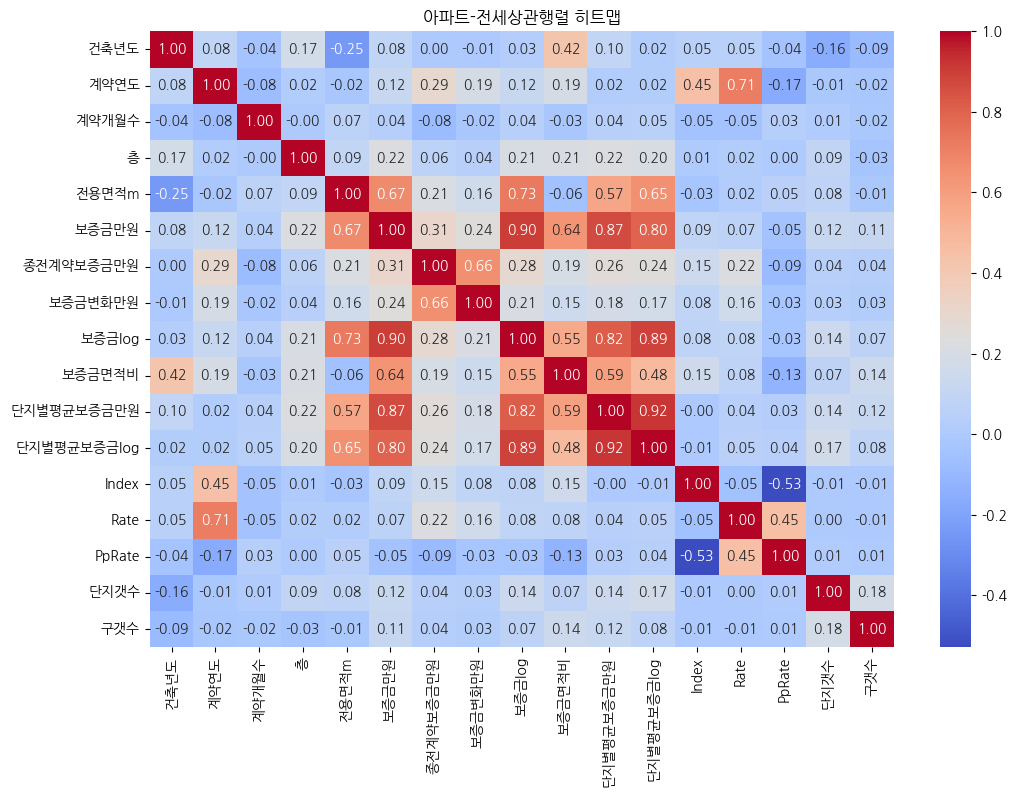

In [ ]:
heat_map(df, numeric_columns)

In [ ]:
sam_df = df[numeric_columns].sample(n=10000, random_state=42)


In [ ]:
scatter_plot(sam_df, numeric_columns)

Output hidden; open in https://colab.research.google.com to view.

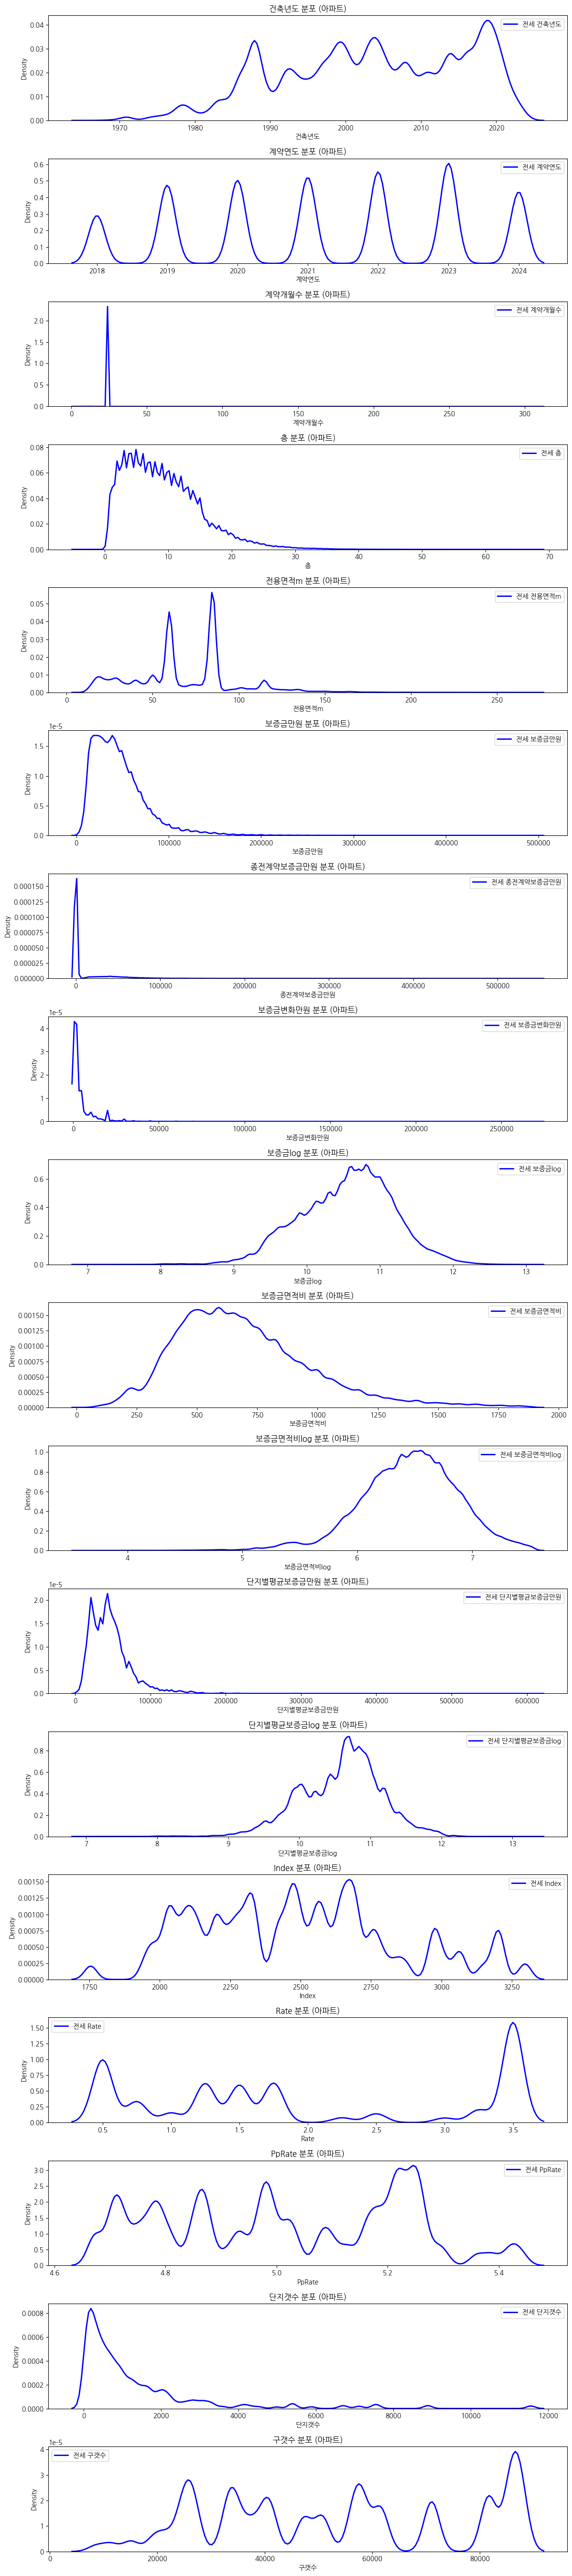

In [ ]:
distribution_plot(df, numeric_columns)

In [ ]:

# from sklearn.ensemble import RandomForestRegressor
# import pandas as pd
# import numpy as np

# # 예제 데이터 (X, y 분리)
# X = df.drop(columns=["보증금만원"])  # 입력 데이터
# y = df["보증금만원"]  # 목표 변수

# # 범주형 데이터 인코딩 (One-Hot Encoding)
# X = pd.get_dummies(X)

# # 모델 학습
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X, y)

# # 피처 중요도 추출
# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances = feature_importances.sort_values(ascending=False)

# # 결과 시각화
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# feature_importances[:15].plot(kind="bar")  # 상위 15개 컬럼
# plt.title("Feature Importance (랜덤포레스트)")
# plt.show()
